# ML in Genomics 
## BiLSTM-2 Training
### Team Members:
    1. Hrishikesh Mahajan
    2. Pratik Kamble
    3. Smridhi Bhat
    4. Yash Shekhadar


In [1]:
# Basic Imports
import gzip as gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import pickle as pkl

# Keras Imports 
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense
from keras.layers import Masking
from keras.regularizers import l2
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Train.npy.gz", "r")
train_raw = np.load(f)
train_data = train_raw.reshape((len(train_raw), 700, 57))
train_x = train_data[:, :, 0:21]
train_y = train_data[:, :, 22:30]

In [3]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Test.npy.gz", "r")
test_raw = np.load(f)
test_data = test_raw.reshape((len(test_raw), 700, 57))
test_x = test_data[:, :, 0:21]
test_y = test_data[:, :, 22:30]

In [4]:
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(700, 21)))
model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001), bias_regularizer=l2(0.001))))
model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001), bias_regularizer=l2(0.001))))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',  'mae'])

In [5]:
filepath = '/content/drive/MyDrive/MLG/Model-4/Model-4.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [13]:
history = model.fit(train_x, train_y, epochs=100, validation_data = (test_x, test_y), batch_size=32,callbacks=[checkpoint])

Epoch 1/100
168/168 [==============================] - ETA: 0s - loss: 0.4231 - acc: 0.5007 - mae: 0.1597
Epoch 1: val_loss did not improve from 0.33330
168/168 [==============================] - 62s 368ms/step - loss: 0.4231 - acc: 0.5007 - mae: 0.1597 - val_loss: 0.3352 - val_acc: 0.4827 - val_mae: 0.1610
Epoch 2/100
168/168 [==============================] - ETA: 0s - loss: 0.4218 - acc: 0.5027 - mae: 0.1594
Epoch 2: val_loss did not improve from 0.33330
168/168 [==============================] - 61s 366ms/step - loss: 0.4218 - acc: 0.5027 - mae: 0.1594 - val_loss: 0.3334 - val_acc: 0.4855 - val_mae: 0.1626
Epoch 3/100
168/168 [==============================] - ETA: 0s - loss: 0.4215 - acc: 0.5032 - mae: 0.1593
Epoch 3: val_loss did not improve from 0.33330
168/168 [==============================] - 61s 366ms/step - loss: 0.4215 - acc: 0.5032 - mae: 0.1593 - val_loss: 0.3341 - val_acc: 0.4839 - val_mae: 0.1607
Epoch 4/100
168/168 [==============================] - ETA: 0s - loss: 0.

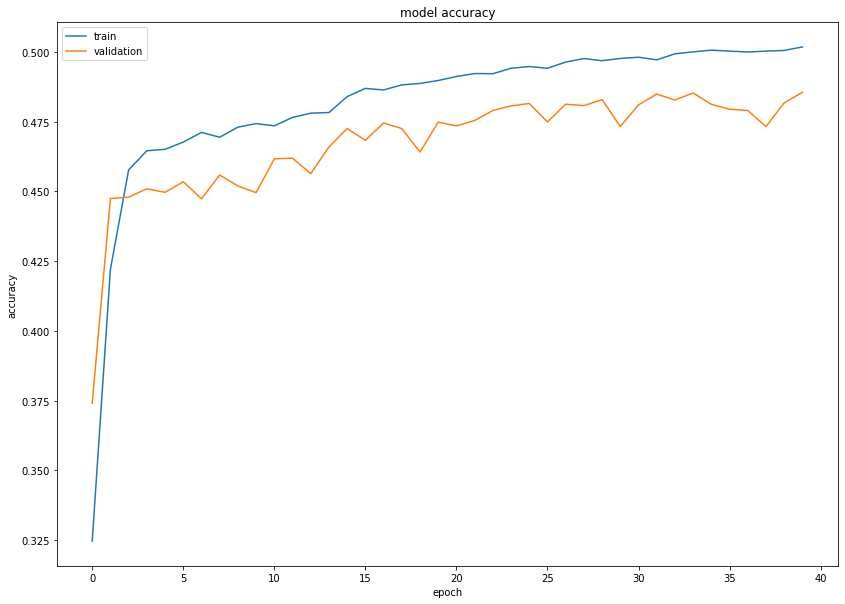

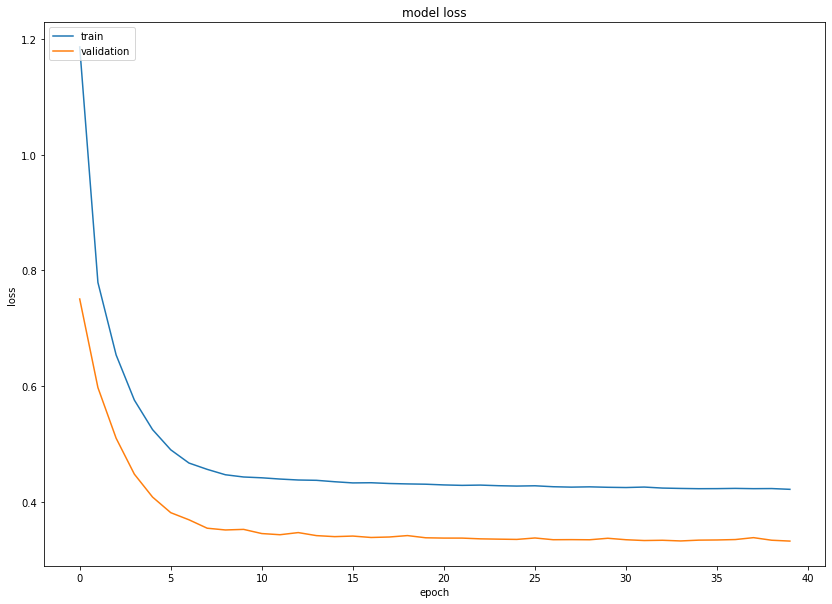

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

# "Accuracy"
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
model.save("/content/drive/MyDrive/MLG/Model-4/D4.h5")
file = open("/content/drive/MyDrive/MLG/Model-4/D4.history", "wb")
pkl.dump(history, file)

INFO:tensorflow:Assets written to: ram://92d54e54-fc6a-4de1-b585-86fb84e3c1c3/assets


INFO:tensorflow:Assets written to: ram://92d54e54-fc6a-4de1-b585-86fb84e3c1c3/assets


In [9]:
test_pred = model.predict(np.array([test_x[0]]))

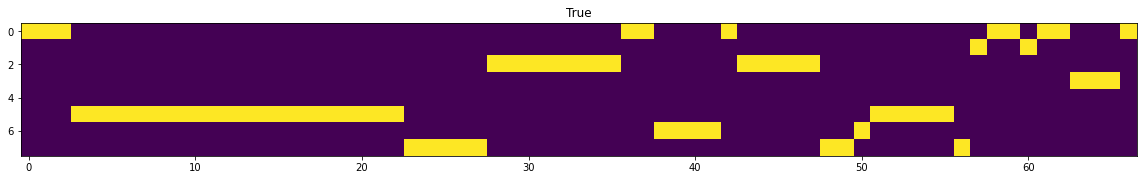

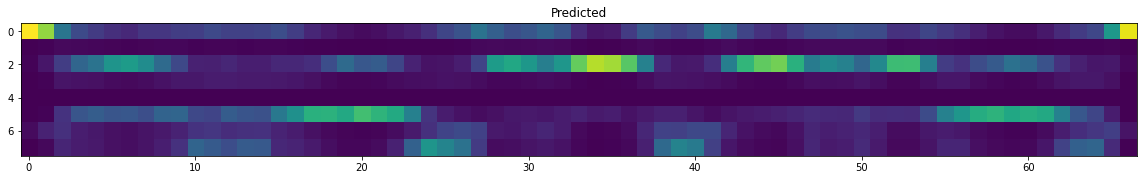

In [10]:
plt.figure(figsize=(20,4))
plt.title("True")
plt.imshow(test_y[0][0:67].T)
plt.figure(figsize=(20,4))
plt.title("Predicted")
plt.imshow(test_pred[0][0:67].T)

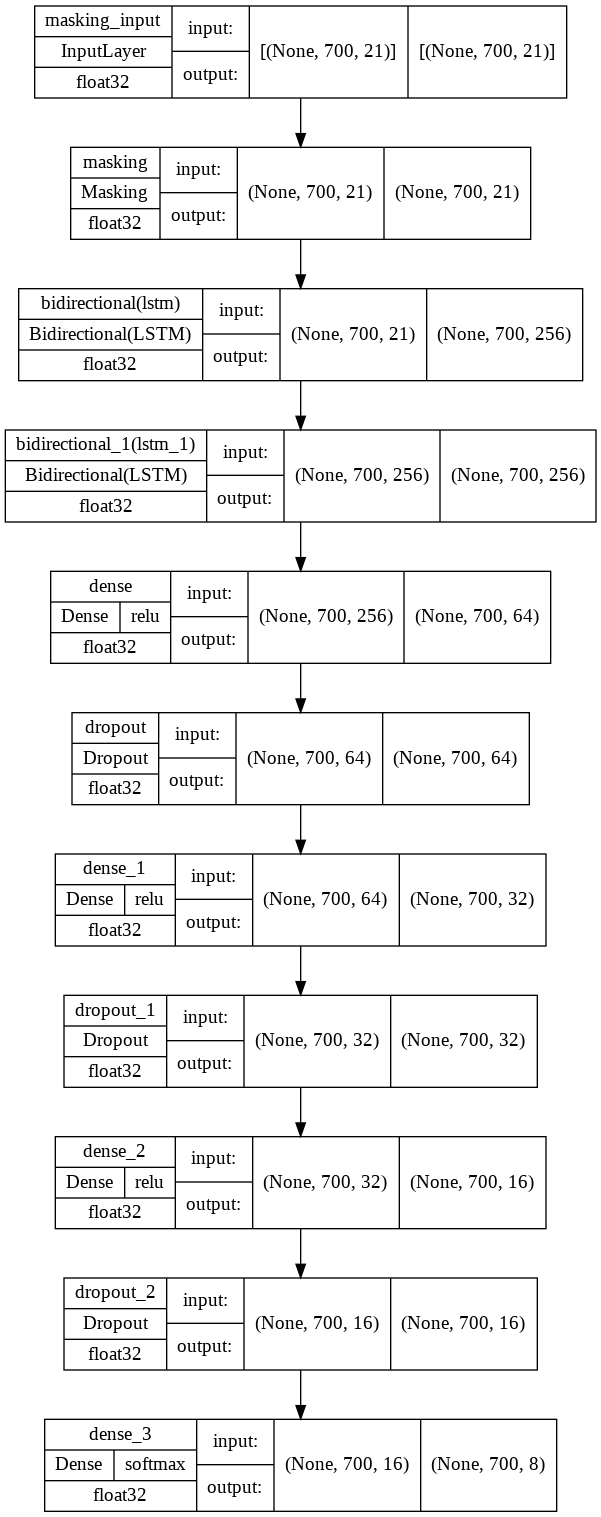

In [11]:
import tensorflow
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)